# Backtesting ML Classification-Based

### Load the model

In [1]:
import pickle

In [2]:
with open("models/model_dt_classification.pkl", "rb") as f:
    model_dt = pickle.load(f)

In [3]:
model_dt

DecisionTreeClassifier(max_depth=15)

### Load the Data

In [4]:
import pandas as pd

df = pd.read_excel("data/MSFT_Linkedin_Processed.xlsx", index_col=0, parse_dates=["Date"])
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-10-09,324.750000,330.299988,323.179993,329.820007,19891200,-0.435456,DOWN
2023-10-10,330.959991,331.100006,327.670013,328.390015,20557100,1.212321,UP
2023-10-11,331.209991,332.820007,329.140015,332.420013,20063200,-0.380484,DOWN


## Backtesting.py

### Creating Strategy Class

In [5]:
from backtesting import Backtest, Strategy

In [6]:
df_explanatory = df.drop(columns=["change_tomorrow", "change_tomorrow_direction"])

In [7]:
model_dt.predict(X=df_explanatory)

array(['UP', 'UP', 'UP', ..., 'DOWN', 'DOWN', 'UP'], dtype=object)

In [8]:
explanatory_today = df_explanatory.iloc[[-1],:]

In [9]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

In [10]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt

    def next(self):
        explanatory_today = df_explanatory.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]

        # condition to sell or buy

## Calculate Purchase Recommendation

### Buy if it goes up

In [11]:
list_buy_sell = []

In [12]:
for tomorrow_direction in df.change_tomorrow_direction:
    if tomorrow_direction == "UP":
        list_buy_sell.append(1)
    elif tomorrow_direction == "DOWN":
        list_buy_sell.append(-1)

In [13]:
df["buy_sell"] = list_buy_sell

In [14]:
df[["change_tomorrow_direction", "buy_sell"]].head(10)

,change_tomorrow_direction,buy_sell
Date,,
2016-12-08,UP,1
2016-12-09,UP,1
2016-12-12,UP,1
2016-12-13,DOWN,-1
2016-12-14,DOWN,-1
2016-12-15,DOWN,-1
2016-12-16,UP,1
2016-12-19,DOWN,-1
2016-12-20,DOWN,-1


### Buy if it goes up and sell if down

##### You can only Sell if you have brought already

In [15]:
list_buy_sell = []
already_bought = False

In [16]:
for tomorrow_direction in df.change_tomorrow_direction:
    if tomorrow_direction == "UP" and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif tomorrow_direction == "DOWN" and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

In [17]:
df["buy_sell_track"] = list_buy_sell

In [18]:
df[["change_tomorrow_direction", "buy_sell", "buy_sell_track"]].head(50)

,change_tomorrow_direction,buy_sell,buy_sell_track
Date,,,
2016-12-08,UP,1,1
2016-12-09,UP,1,0
2016-12-12,UP,1,0
2016-12-13,DOWN,-1,-1
2016-12-14,DOWN,-1,0
2016-12-15,DOWN,-1,0
2016-12-16,UP,1,1
2016-12-19,DOWN,-1,-1
2016-12-20,DOWN,-1,0


### Adding conditions to the Strategy

In [19]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:,:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]

        # condition to sell or buy
        if forecast_tomorrow == "UP" and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif tomorrow_direction == "DOWN" and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

## Define Initial Condition

In [20]:
bt = Backtest(df_explanatory, strategy = ClassificationUP,
              cash=1000, commission=.002, exclusive_orders=True)

## Run backtesting

In [21]:
results = bt.run()

## Interpreting Backtesting Results

In [22]:
results.to_frame(name="Values").loc[:"Return [%]"]

,Values
Start,2016-12-08 00:00:00
End,2023-10-13 00:00:00
Duration,2500 days 00:00:00
Exposure Time [%],99.883923
Equity Final [$],53540.254795
Equity Peak [$],57904.962437
Return [%],435.402548


<Axes: xlabel='Date'>

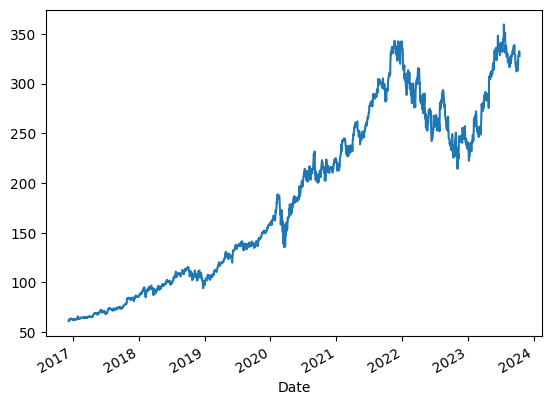

In [23]:
df.Close.plot()